In [131]:
from sys import platform

import matplotlib.pyplot as plt
import numpy as np 
import numpy as np
import os
import cv2
import colorful as cf

#os.chdir('..')
#os.chdir('..')

print(os.getcwd())

/home/tommaselli/Documents/IC_NN_Lidar


In [132]:
global fid
fid = 4

global filename
global folder
filename = "Crop_Data" + str(fid) + ".csv"
folder = "datasets/gazebo"

In [133]:
def getData(name: str, folder: str) -> list:
    """ This function gets the data from the.csv file. """
    # move from root (\src) to \assets\tags or \datasets
    if os.getcwd().split('/')[-1] == 'src':
        os.chdir('..') 
    path = os.getcwd() + '/' + str(folder) + '/'
    data_file_name = os.path.join(path, name) # merge path and filename

    # open file and read all data if possible
    print("Opening file: ", data_file_name, end=' ')
    if os.path.exists(data_file_name):
        filedata = open(data_file_name,"r")
        print('[SUCESS]')
    else:
        print("[ERROR]\nFile not found, we are going to create a new one")
        filedata = open(data_file_name,"w+")

    data = filedata.readlines()
    filedata.close()
    return data # returns file data

In [134]:
def filterData(readings) -> list:
    """ This function normalizes data and limits the lidar data to a maximum value of 5 meters. """
    #readings = list(map(lambda s: s.replace('\"', '').strip(), readings)) # remove \n and others
    #readings = list(map(lambda s: s.replace('inf', '').strip(), readings)) # remove inf and others
    #readings = [e for e in readings if e != ''] # remove empty elements
    readings = list(map(float, readings[2:])) # convert to float
    # if len(readings) > 0:
    #     # if mean of readings is higher than 10, the normalization is necessary
    #     if float(np.mean(readings)) > 10.0:
    #         final_readings = [float(r)/1000 for r in readings if float(r)/1000 < 10] # normalizing the data
    #     else: 
    #         final_readings = [float(r) for r in readings if float(r) < 10]
    # else: 
    #     final_readings = readings
    return readings

In [135]:
def polar2xy(lidar, N) -> list:
    """ This function converts the polar coordinates of the lidar data to cartesian coordinates."""
    min_angle = np.deg2rad(0)
    max_angle = np.deg2rad(180) # lidar range
    angle = np.linspace(min_angle, max_angle, N, endpoint = False)
    print(cf.green(f'Uising {N} points, {np.rad2deg(min_angle)}º to {np.rad2deg(max_angle)}º in {angle[1] - angle[0]} steps'))

    # convert polar to cartesian:
    # x = r * cos(theta)
    # y = r * sin(theta)
    # where r is the distance from the lidar (x in lidar)
    # and angle is the step between the angles measure in each distance (angle(lidar.index(x))
    x_lidar = [x*np.cos(angle[lidar.index(x)]) for x in lidar]
    y_lidar = [y*np.sin(angle[lidar.index(y)]) for y in lidar]

    #TODO: Plotar em coordenada polar e testar 270º graus

    return x_lidar, y_lidar

In [136]:
def plot_lines(xl: list, yl: list, t: int) -> None:
    """ This function plots the lidar data in a 2D space. """

    POINT_WIDTH = 18
    if len(xl) > 0:
        # Create a figure with two subplots side by side
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))

        # Plotting the first graph
        axes[0].cla()
        axes[0].plot(xl, yl, '.', markersize=POINT_WIDTH, color='black')
        #axes[0].axis('off')
        axes[0].grid(False)

        # Plotting the second graph
        axes[1].cla()
        axes[1].plot(xl, yl, '.', markersize=POINT_WIDTH, color='black')
        #axes[1].axis('off')
        axes[1].grid(False)
        axes[0].set_xlim([-0.5, 6.0])
        axes[0].set_ylim([-0.2, 3.5])
        
        # Adjust layout and show the figure
        plt.tight_layout()
        plt.show()

        print(f'[{t}]')
        if os.getcwd().split('/')[-1] == 'src':
            os.chdir('..')
        path = ''. join([os.getcwd(), '/', 'data', '/', 'gazebo_data', '/', 'train', str(fid), '/'])
        # plt.savefig(path + 'image'+str(t))



Opening file:  /home/tommaselli/Documents/IC_NN_Lidar/datasets/gazebo/Crop_Data4.csv [SUCESS]
Uising 1082 points, 0.0º to 180.0º in 0.002903505225129199 steps
135.2180396508743


/tmp/ipykernel_5922/73925372.py:15: RuntimeWarning: invalid value encountered in double_scalars
  y_lidar = [y*np.sin(angle[lidar.index(y)]) for y in lidar]


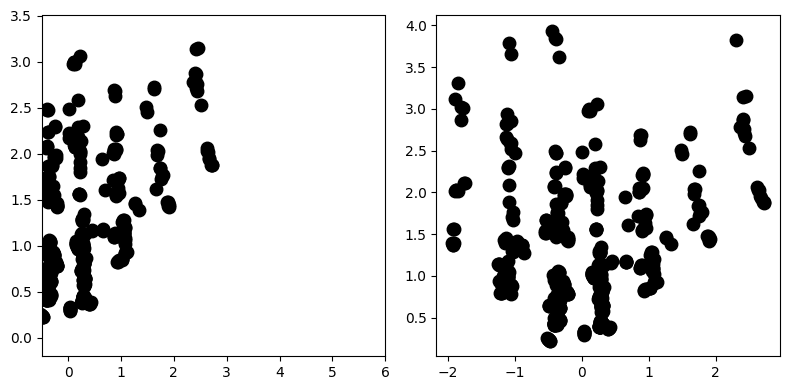

[2]
Uising 1082 points, 0.0º to 180.0º in 0.002903505225129199 steps
135.2180396508743


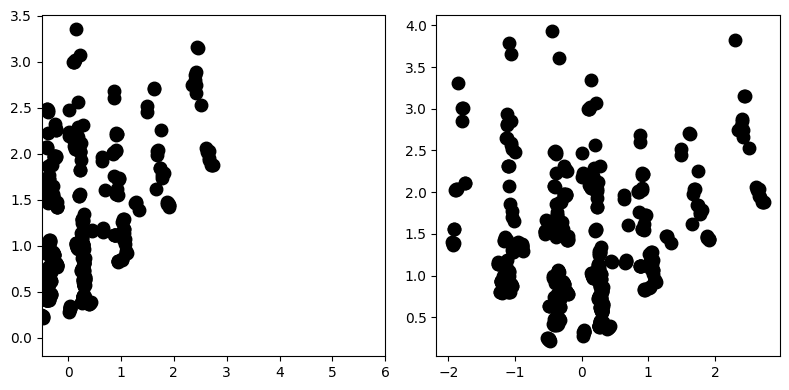

[4]
Uising 1082 points, 0.0º to 180.0º in 0.002903505225129199 steps
135.2180396508743


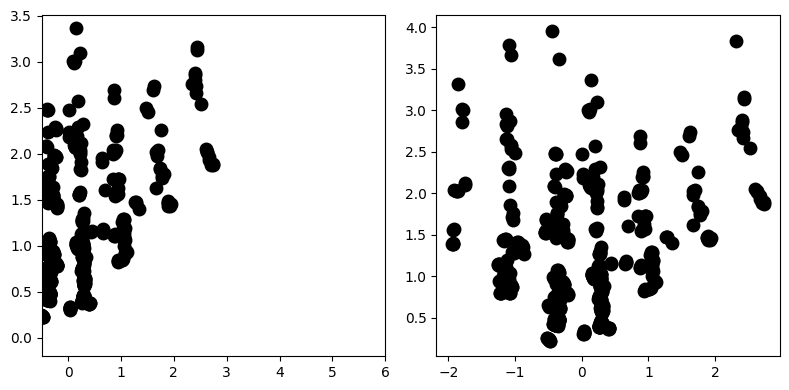

[6]
Uising 1082 points, 0.0º to 180.0º in 0.002903505225129199 steps
135.2180396508743


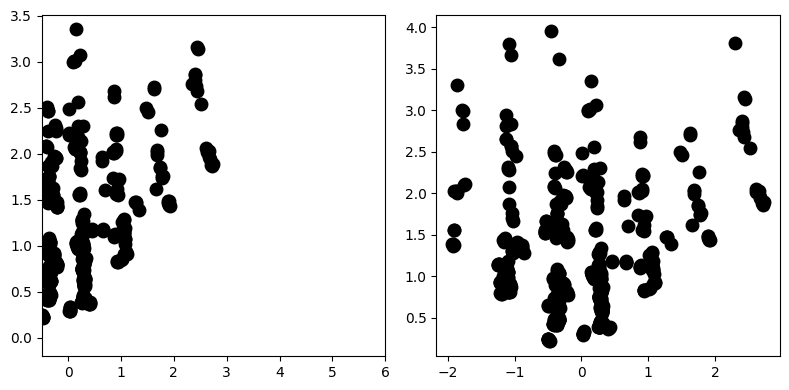

[8]


In [137]:
while True:
    try:
        data = getData(name=filename, folder=folder)
        break
    except Exception as e:
        print("Error: ", e)
        print("File not found, please try again")
        filename = input("Please enter the file name: ")

for step in range(0,10):
    # split data (each line) in a lista with all the values
    readings = data[step].split(",")

    lidar_readings = filterData(readings=readings)
    if len(lidar_readings)>0:
        x,y = polar2xy(lidar=lidar_readings, N=len(readings)) 
        plot_lines(xl=x, yl=y, t=step)
    else:
        pass
